In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [13]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import tensorflow_probability as tfp

### 1. Data

In [2]:
df = pd.read_csv("data/hien_data.csv", index_col=0)
df["profitability"] = df.gross / (df.budget + 1) # avoid budget = 0
df = df.drop([*df.select_dtypes(['object']).columns, "gross"], axis=1) # drop all the qualitative columns

In [3]:
df.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
Biography                      int64
Comedy                         int64
Crime                          int64
Drama                          int64
Romance                        int64
Mystery_Thriller_Horror        int64
Sci-Fi_Fantasy                 int64
Family_Animation               int64
Action_Adventure               int64
History_War                    int64
Others                         int64
profitability                float64
dtype: object

In [20]:
not_include = ["imdb_score", "profitability", "num_voted_users", "title_year", "num_critic_for_reviews",
              "num_user_for_reviews"]

In [21]:
X = df.loc[:, ~df.columns.isin(not_include)]
y1 = df[["imdb_score"]]

In [22]:
X

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,actor_2_facebook_likes,movie_facebook_likes,Biography,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others
0,123.0,446.0,821.0,20000.0,22209,1.0,48000000.0,1000.0,0,0,1,0,0,1,0,1,0,0,0,0
1,88.0,104.0,318.0,628.0,2726,0.0,3500000.0,575.0,16000,0,1,0,0,0,0,0,0,0,0,0
2,104.0,116.0,83.0,1000.0,1662,0.0,4500000.0,511.0,0,0,0,0,1,1,0,0,0,1,0,0
3,148.0,644.0,326.0,1000.0,2566,1.0,27000000.0,809.0,14000,0,1,1,0,0,0,0,0,1,0,1
4,98.0,11000.0,484.0,13000.0,14921,3.0,6000000.0,573.0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,81.0,26.0,300.0,2000.0,3344,0.0,4900000.0,509.0,0,0,0,0,0,0,1,0,0,0,0,0
3874,120.0,18.0,295.0,634.0,1810,11.0,5000000.0,420.0,0,0,0,0,1,0,0,0,0,0,0,0
3875,96.0,23.0,503.0,927.0,3552,6.0,5000000.0,509.0,740,0,1,0,0,1,0,0,0,0,0,0
3876,115.0,32.0,29.0,14000.0,14133,1.0,12620000.0,81.0,139,0,0,0,1,0,0,0,0,1,1,0


In [23]:
X_stats = X.describe().transpose()
def norm(x):
    return (x - X_stats["mean"])/X_stats["std"]

normed_X = norm(X)

In [24]:
normed_X.keys()

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'budget', 'actor_2_facebook_likes',
       'movie_facebook_likes', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Romance', 'Mystery_Thriller_Horror', 'Sci-Fi_Fantasy',
       'Family_Animation', 'Action_Adventure', 'History_War', 'Others'],
      dtype='object')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(normed_X, y1, test_size=0.33, random_state=42)
# train_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_train), np.array(y2_train)))
# test_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_test), np.array(y2_test)))

### 2. Predict IMDB Scores

In [26]:
model = tfk.Sequential([
    #tfk.Input(shape=(25,)),
    #tfkl.BatchNormalization(), # normalise data here
    tfkl.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(32, activation='relu'),
    tfkl.Dense(1)
])

In [27]:
model.compile(optimizer=tf.optimizers.Adam(1e-4), loss=tfk.losses.mean_squared_error, metrics=["mse", "mae"])

In [28]:
model.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=100, 
          epochs=500, workers=10, use_multiprocessing=True)

Train on 2078 samples, validate on 520 samples
Epoch 1/500
2078/2078 [==============================] - 1s 286us/sample - loss: 47.5107 - mse: 47.5107 - mae: 6.8024 - val_loss: 45.7211 - val_mse: 45.7211 - val_mae: 6.6752
Epoch 2/500
2078/2078 [==============================] - 0s 24us/sample - loss: 44.8780 - mse: 44.8781 - mae: 6.6104 - val_loss: 43.2407 - val_mse: 43.2407 - val_mae: 6.4903
Epoch 3/500
2078/2078 [==============================] - 0s 26us/sample - loss: 42.4132 - mse: 42.4132 - mae: 6.4239 - val_loss: 40.9160 - val_mse: 40.9160 - val_mae: 6.3110
Epoch 4/500
2078/2078 [==============================] - 0s 28us/sample - loss: 40.1005 - mse: 40.1005 - mae: 6.2415 - val_loss: 38.7109 - val_mse: 38.7109 - val_mae: 6.1348
Epoch 5/500
2078/2078 [==============================] - 0s 24us/sample - loss: 37.9096 - mse: 37.9096 - mae: 6.0632 - val_loss: 36.5960 - val_mse: 36.5960 - val_mae: 5.9599
Epoch 6/500
2078/2078 [==============================] - 0s 25us/sample - loss: 35

2078/2078 [==============================] - 0s 23us/sample - loss: 2.7006 - mse: 2.7006 - mae: 1.1552 - val_loss: 2.1206 - val_mse: 2.1206 - val_mae: 1.1287
Epoch 49/500
2078/2078 [==============================] - 0s 24us/sample - loss: 2.6442 - mse: 2.6442 - mae: 1.1395 - val_loss: 2.0801 - val_mse: 2.0801 - val_mae: 1.1137
Epoch 50/500
2078/2078 [==============================] - 0s 25us/sample - loss: 2.5899 - mse: 2.5899 - mae: 1.1284 - val_loss: 2.0575 - val_mse: 2.0575 - val_mae: 1.1067
Epoch 51/500
2078/2078 [==============================] - 0s 30us/sample - loss: 2.5338 - mse: 2.5338 - mae: 1.1183 - val_loss: 2.0267 - val_mse: 2.0267 - val_mae: 1.0957
Epoch 52/500
2078/2078 [==============================] - 0s 25us/sample - loss: 2.4815 - mse: 2.4815 - mae: 1.1060 - val_loss: 1.9990 - val_mse: 1.9990 - val_mae: 1.0858
Epoch 53/500
2078/2078 [==============================] - 0s 27us/sample - loss: 2.4368 - mse: 2.4368 - mae: 1.0955 - val_loss: 1.9685 - val_mse: 1.9685 - val

Epoch 96/500
2078/2078 [==============================] - 0s 26us/sample - loss: 1.3637 - mse: 1.3637 - mae: 0.8610 - val_loss: 1.3140 - val_mse: 1.3140 - val_mae: 0.8446
Epoch 97/500
2078/2078 [==============================] - 0s 24us/sample - loss: 1.3493 - mse: 1.3493 - mae: 0.8582 - val_loss: 1.3040 - val_mse: 1.3040 - val_mae: 0.8409
Epoch 98/500
2078/2078 [==============================] - 0s 27us/sample - loss: 1.3350 - mse: 1.3350 - mae: 0.8541 - val_loss: 1.2934 - val_mse: 1.2934 - val_mae: 0.8367
Epoch 99/500
2078/2078 [==============================] - 0s 46us/sample - loss: 1.3206 - mse: 1.3206 - mae: 0.8499 - val_loss: 1.2822 - val_mse: 1.2822 - val_mae: 0.8322
Epoch 100/500
2078/2078 [==============================] - 0s 28us/sample - loss: 1.3089 - mse: 1.3089 - mae: 0.8456 - val_loss: 1.2734 - val_mse: 1.2734 - val_mae: 0.8284
Epoch 101/500
2078/2078 [==============================] - 0s 26us/sample - loss: 1.2951 - mse: 1.2951 - mae: 0.8428 - val_loss: 1.2657 - val_ms

Epoch 144/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.9647 - mse: 0.9647 - mae: 0.7385 - val_loss: 1.0037 - val_mse: 1.0037 - val_mae: 0.7311
Epoch 145/500
2078/2078 [==============================] - 0s 24us/sample - loss: 0.9600 - mse: 0.9600 - mae: 0.7363 - val_loss: 0.9997 - val_mse: 0.9997 - val_mae: 0.7290
Epoch 146/500
2078/2078 [==============================] - 0s 29us/sample - loss: 0.9557 - mse: 0.9557 - mae: 0.7342 - val_loss: 0.9957 - val_mse: 0.9957 - val_mae: 0.7276
Epoch 147/500
2078/2078 [==============================] - 0s 25us/sample - loss: 0.9513 - mse: 0.9513 - mae: 0.7336 - val_loss: 0.9920 - val_mse: 0.9920 - val_mae: 0.7272
Epoch 148/500
2078/2078 [==============================] - 0s 28us/sample - loss: 0.9470 - mse: 0.9470 - mae: 0.7319 - val_loss: 0.9888 - val_mse: 0.9888 - val_mae: 0.7251
Epoch 149/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.9430 - mse: 0.9430 - mae: 0.7294 - val_loss: 0.9839 - va

2078/2078 [==============================] - 0s 24us/sample - loss: 0.8142 - mse: 0.8142 - mae: 0.6797 - val_loss: 0.8586 - val_mse: 0.8586 - val_mae: 0.6785
Epoch 192/500
2078/2078 [==============================] - 0s 24us/sample - loss: 0.8118 - mse: 0.8118 - mae: 0.6795 - val_loss: 0.8561 - val_mse: 0.8561 - val_mae: 0.6785
Epoch 193/500
2078/2078 [==============================] - 0s 26us/sample - loss: 0.8096 - mse: 0.8096 - mae: 0.6791 - val_loss: 0.8535 - val_mse: 0.8535 - val_mae: 0.6775
Epoch 194/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.8076 - mse: 0.8076 - mae: 0.6773 - val_loss: 0.8520 - val_mse: 0.8520 - val_mae: 0.6761
Epoch 195/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.8054 - mse: 0.8054 - mae: 0.6762 - val_loss: 0.8497 - val_mse: 0.8497 - val_mae: 0.6752
Epoch 196/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.8028 - mse: 0.8028 - mae: 0.6758 - val_loss: 0.8468 - val_mse: 0.8468 

Epoch 239/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.7321 - mse: 0.7321 - mae: 0.6452 - val_loss: 0.7813 - val_mse: 0.7813 - val_mae: 0.6481
Epoch 240/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.7303 - mse: 0.7303 - mae: 0.6443 - val_loss: 0.7808 - val_mse: 0.7808 - val_mae: 0.6473
Epoch 241/500
2078/2078 [==============================] - 0s 25us/sample - loss: 0.7294 - mse: 0.7294 - mae: 0.6442 - val_loss: 0.7794 - val_mse: 0.7794 - val_mae: 0.6469
Epoch 242/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.7283 - mse: 0.7283 - mae: 0.6437 - val_loss: 0.7784 - val_mse: 0.7784 - val_mae: 0.6468
Epoch 243/500
2078/2078 [==============================] - 0s 25us/sample - loss: 0.7266 - mse: 0.7266 - mae: 0.6423 - val_loss: 0.7789 - val_mse: 0.7789 - val_mae: 0.6462
Epoch 244/500
2078/2078 [==============================] - 0s 24us/sample - loss: 0.7258 - mse: 0.7258 - mae: 0.6415 - val_loss: 0.7783 - va

2078/2078 [==============================] - 0s 23us/sample - loss: 0.6826 - mse: 0.6826 - mae: 0.6228 - val_loss: 0.7461 - val_mse: 0.7461 - val_mae: 0.6338
Epoch 287/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.6817 - mse: 0.6817 - mae: 0.6216 - val_loss: 0.7462 - val_mse: 0.7462 - val_mae: 0.6333
Epoch 288/500
2078/2078 [==============================] - 0s 40us/sample - loss: 0.6808 - mse: 0.6808 - mae: 0.6214 - val_loss: 0.7455 - val_mse: 0.7455 - val_mae: 0.6342
Epoch 289/500
2078/2078 [==============================] - 0s 49us/sample - loss: 0.6802 - mse: 0.6802 - mae: 0.6218 - val_loss: 0.7443 - val_mse: 0.7443 - val_mae: 0.6341
Epoch 290/500
2078/2078 [==============================] - 0s 25us/sample - loss: 0.6792 - mse: 0.6792 - mae: 0.6201 - val_loss: 0.7454 - val_mse: 0.7454 - val_mae: 0.6332
Epoch 291/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.6792 - mse: 0.6792 - mae: 0.6214 - val_loss: 0.7437 - val_mse: 0.7437 

Epoch 334/500
2078/2078 [==============================] - 0s 24us/sample - loss: 0.6481 - mse: 0.6481 - mae: 0.6056 - val_loss: 0.7304 - val_mse: 0.7304 - val_mae: 0.6297
Epoch 335/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.6474 - mse: 0.6474 - mae: 0.6050 - val_loss: 0.7301 - val_mse: 0.7301 - val_mae: 0.6298
Epoch 336/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.6470 - mse: 0.6470 - mae: 0.6053 - val_loss: 0.7298 - val_mse: 0.7298 - val_mae: 0.6296
Epoch 337/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.6461 - mse: 0.6461 - mae: 0.6039 - val_loss: 0.7324 - val_mse: 0.7324 - val_mae: 0.6293
Epoch 338/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.6454 - mse: 0.6454 - mae: 0.6051 - val_loss: 0.7291 - val_mse: 0.7291 - val_mae: 0.6303
Epoch 339/500
2078/2078 [==============================] - 0s 26us/sample - loss: 0.6447 - mse: 0.6447 - mae: 0.6038 - val_loss: 0.7300 - va

2078/2078 [==============================] - 0s 21us/sample - loss: 0.6235 - mse: 0.6235 - mae: 0.5923 - val_loss: 0.7274 - val_mse: 0.7274 - val_mae: 0.6312
Epoch 382/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.6227 - mse: 0.6227 - mae: 0.5927 - val_loss: 0.7261 - val_mse: 0.7261 - val_mae: 0.6311
Epoch 383/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.6213 - mse: 0.6213 - mae: 0.5923 - val_loss: 0.7259 - val_mse: 0.7259 - val_mae: 0.6314
Epoch 384/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.6215 - mse: 0.6215 - mae: 0.5919 - val_loss: 0.7258 - val_mse: 0.7258 - val_mae: 0.6316
Epoch 385/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.6214 - mse: 0.6214 - mae: 0.5919 - val_loss: 0.7273 - val_mse: 0.7273 - val_mae: 0.6305
Epoch 386/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.6197 - mse: 0.6197 - mae: 0.5910 - val_loss: 0.7254 - val_mse: 0.7254 

Epoch 429/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.6013 - mse: 0.6013 - mae: 0.5817 - val_loss: 0.7267 - val_mse: 0.7267 - val_mae: 0.6344
Epoch 430/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.6015 - mse: 0.6015 - mae: 0.5809 - val_loss: 0.7252 - val_mse: 0.7252 - val_mae: 0.6340
Epoch 431/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.6008 - mse: 0.6008 - mae: 0.5817 - val_loss: 0.7235 - val_mse: 0.7235 - val_mae: 0.6349
Epoch 432/500
2078/2078 [==============================] - 0s 21us/sample - loss: 0.6005 - mse: 0.6005 - mae: 0.5825 - val_loss: 0.7244 - val_mse: 0.7244 - val_mae: 0.6347
Epoch 433/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.5998 - mse: 0.5998 - mae: 0.5804 - val_loss: 0.7267 - val_mse: 0.7267 - val_mae: 0.6347
Epoch 434/500
2078/2078 [==============================] - 0s 22us/sample - loss: 0.5992 - mse: 0.5992 - mae: 0.5804 - val_loss: 0.7253 - va

2078/2078 [==============================] - 0s 24us/sample - loss: 0.5830 - mse: 0.5830 - mae: 0.5713 - val_loss: 0.7276 - val_mse: 0.7276 - val_mae: 0.6381
Epoch 477/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.5829 - mse: 0.5829 - mae: 0.5724 - val_loss: 0.7256 - val_mse: 0.7256 - val_mae: 0.6373
Epoch 478/500
2078/2078 [==============================] - 0s 25us/sample - loss: 0.5825 - mse: 0.5825 - mae: 0.5717 - val_loss: 0.7282 - val_mse: 0.7282 - val_mae: 0.6378
Epoch 479/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.5823 - mse: 0.5823 - mae: 0.5720 - val_loss: 0.7271 - val_mse: 0.7271 - val_mae: 0.6376
Epoch 480/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.5816 - mse: 0.5816 - mae: 0.5708 - val_loss: 0.7279 - val_mse: 0.7279 - val_mae: 0.6379
Epoch 481/500
2078/2078 [==============================] - 0s 24us/sample - loss: 0.5821 - mse: 0.5821 - mae: 0.5716 - val_loss: 0.7293 - val_mse: 0.7293 

In [29]:
preds = model.predict(np.array(X_test)).flatten()

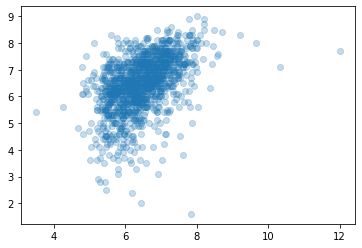

In [30]:
plt.scatter(preds, np.array(y_test).flatten(), alpha=0.25) # some correlations going on here but definitely not linear

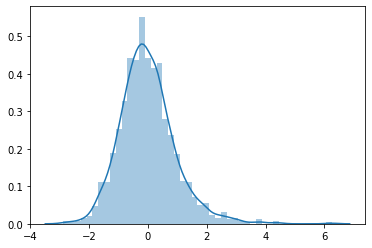

In [31]:
errors = preds - np.array(y_test).flatten()
sns.distplot(errors) # We expect the distribution to be normal around zero!

### 3. Predict Profitability

#### 3.1. Traditional neural network predicting log profitability

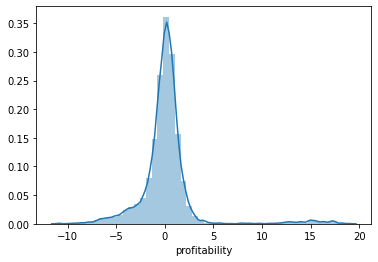

In [32]:
sns.distplot(np.log(df["profitability"]))

In [35]:
df.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
Biography                      int64
Comedy                         int64
Crime                          int64
Drama                          int64
Romance                        int64
Mystery_Thriller_Horror        int64
Sci-Fi_Fantasy                 int64
Family_Animation               int64
Action_Adventure               int64
History_War                    int64
Others                         int64
profitability                float64
dtype: object

In [36]:
# not_include = ["imdb_score", "profitability", "num_voted_users", "title_year", "num_critic_for_reviews",
#               "num_user_for_reviews"]
# X = 
y2 = np.log(df["profitability"])

In [37]:
# X remains the same, but labels are now y2
X_train, X_test, y_train, y_test = train_test_split(normed_X, y2, test_size=0.33, random_state=42)

In [38]:
model2 = tfk.Sequential([
    #tfk.Input(shape=(25,)),
    #tfkl.BatchNormalization(), # normalise data here
    tfkl.Dense(128, activation='selu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(64, activation='selu'),
    tfkl.Dense(32, activation='selu'),
    tfkl.Dense(1)
])

model2.compile(optimizer=tf.optimizers.Adam(1e-2), loss=tfk.losses.mean_squared_error, metrics=["mse", "mae"])
model2.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=200, 
          epochs=500, workers=10, use_multiprocessing=True)

Train on 2078 samples, validate on 520 samples
Epoch 1/500
2078/2078 [==============================] - 0s 213us/sample - loss: 9.8786 - mse: 9.8786 - mae: 1.8358 - val_loss: 9.4227 - val_mse: 9.4227 - val_mae: 1.8419
Epoch 2/500
2078/2078 [==============================] - 0s 20us/sample - loss: 8.7895 - mse: 8.7895 - mae: 1.6371 - val_loss: 9.0614 - val_mse: 9.0614 - val_mae: 1.7011
Epoch 3/500
2078/2078 [==============================] - 0s 19us/sample - loss: 8.4904 - mse: 8.4904 - mae: 1.5941 - val_loss: 9.1091 - val_mse: 9.1091 - val_mae: 1.7105
Epoch 4/500
2078/2078 [==============================] - 0s 20us/sample - loss: 8.3199 - mse: 8.3199 - mae: 1.5841 - val_loss: 9.2421 - val_mse: 9.2421 - val_mae: 1.6520
Epoch 5/500
2078/2078 [==============================] - 0s 19us/sample - loss: 8.5742 - mse: 8.5742 - mae: 1.6068 - val_loss: 9.1451 - val_mse: 9.1451 - val_mae: 1.6877
Epoch 6/500
2078/2078 [==============================] - 0s 22us/sample - loss: 8.1196 - mse: 8.1196 -

2078/2078 [==============================] - 0s 20us/sample - loss: 4.4432 - mse: 4.4432 - mae: 1.2994 - val_loss: 9.3193 - val_mse: 9.3193 - val_mae: 1.8294
Epoch 49/500
2078/2078 [==============================] - 0s 21us/sample - loss: 4.6919 - mse: 4.6919 - mae: 1.3030 - val_loss: 8.5196 - val_mse: 8.5196 - val_mae: 1.8361
Epoch 50/500
2078/2078 [==============================] - 0s 20us/sample - loss: 4.4961 - mse: 4.4961 - mae: 1.3271 - val_loss: 11.1424 - val_mse: 11.1424 - val_mae: 1.9200
Epoch 51/500
2078/2078 [==============================] - 0s 19us/sample - loss: 4.2378 - mse: 4.2378 - mae: 1.2849 - val_loss: 9.7047 - val_mse: 9.7047 - val_mae: 1.8778
Epoch 52/500
2078/2078 [==============================] - 0s 20us/sample - loss: 4.2352 - mse: 4.2352 - mae: 1.2539 - val_loss: 9.9555 - val_mse: 9.9555 - val_mae: 1.8717
Epoch 53/500
2078/2078 [==============================] - 0s 19us/sample - loss: 3.9651 - mse: 3.9651 - mae: 1.2280 - val_loss: 9.4816 - val_mse: 9.4816 - v

Epoch 96/500
2078/2078 [==============================] - 0s 20us/sample - loss: 2.3815 - mse: 2.3815 - mae: 0.9906 - val_loss: 9.4179 - val_mse: 9.4179 - val_mae: 1.8231
Epoch 97/500
2078/2078 [==============================] - 0s 19us/sample - loss: 2.2078 - mse: 2.2078 - mae: 0.9719 - val_loss: 10.3137 - val_mse: 10.3137 - val_mae: 1.9637
Epoch 98/500
2078/2078 [==============================] - 0s 21us/sample - loss: 2.2266 - mse: 2.2266 - mae: 0.9607 - val_loss: 9.5935 - val_mse: 9.5935 - val_mae: 1.8718
Epoch 99/500
2078/2078 [==============================] - 0s 19us/sample - loss: 2.1172 - mse: 2.1172 - mae: 0.9499 - val_loss: 9.2795 - val_mse: 9.2795 - val_mae: 1.8525
Epoch 100/500
2078/2078 [==============================] - 0s 21us/sample - loss: 2.1259 - mse: 2.1259 - mae: 0.9693 - val_loss: 9.9219 - val_mse: 9.9219 - val_mae: 1.8865
Epoch 101/500
2078/2078 [==============================] - 0s 18us/sample - loss: 2.2915 - mse: 2.2915 - mae: 0.9575 - val_loss: 9.7541 - val_

2078/2078 [==============================] - 0s 21us/sample - loss: 1.9252 - mse: 1.9252 - mae: 0.8512 - val_loss: 10.8348 - val_mse: 10.8348 - val_mae: 1.9463
Epoch 144/500
2078/2078 [==============================] - 0s 19us/sample - loss: 2.2963 - mse: 2.2963 - mae: 0.8995 - val_loss: 9.3452 - val_mse: 9.3452 - val_mae: 1.9209
Epoch 145/500
2078/2078 [==============================] - 0s 20us/sample - loss: 1.9829 - mse: 1.9829 - mae: 0.8879 - val_loss: 9.6496 - val_mse: 9.6496 - val_mae: 1.8445
Epoch 146/500
2078/2078 [==============================] - 0s 18us/sample - loss: 1.7252 - mse: 1.7252 - mae: 0.8395 - val_loss: 9.8273 - val_mse: 9.8273 - val_mae: 1.8899
Epoch 147/500
2078/2078 [==============================] - 0s 21us/sample - loss: 1.6519 - mse: 1.6519 - mae: 0.8059 - val_loss: 9.5625 - val_mse: 9.5625 - val_mae: 1.8383
Epoch 148/500
2078/2078 [==============================] - 0s 20us/sample - loss: 1.4696 - mse: 1.4696 - mae: 0.7915 - val_loss: 10.0306 - val_mse: 10.0

2078/2078 [==============================] - 0s 20us/sample - loss: 1.1583 - mse: 1.1583 - mae: 0.7153 - val_loss: 10.6897 - val_mse: 10.6897 - val_mae: 2.0046
Epoch 191/500
2078/2078 [==============================] - 0s 19us/sample - loss: 1.1460 - mse: 1.1460 - mae: 0.6895 - val_loss: 10.4306 - val_mse: 10.4306 - val_mae: 1.9373
Epoch 192/500
2078/2078 [==============================] - 0s 19us/sample - loss: 1.0772 - mse: 1.0772 - mae: 0.6581 - val_loss: 10.4255 - val_mse: 10.4255 - val_mae: 1.9411
Epoch 193/500
2078/2078 [==============================] - 0s 19us/sample - loss: 1.1591 - mse: 1.1591 - mae: 0.6653 - val_loss: 10.4794 - val_mse: 10.4794 - val_mae: 1.9998
Epoch 194/500
2078/2078 [==============================] - 0s 21us/sample - loss: 1.2929 - mse: 1.2929 - mae: 0.7197 - val_loss: 10.4929 - val_mse: 10.4929 - val_mae: 1.8993
Epoch 195/500
2078/2078 [==============================] - 0s 21us/sample - loss: 1.1218 - mse: 1.1218 - mae: 0.7064 - val_loss: 10.7463 - val_m

2078/2078 [==============================] - 0s 19us/sample - loss: 0.8935 - mse: 0.8935 - mae: 0.6034 - val_loss: 10.0710 - val_mse: 10.0710 - val_mae: 1.9313
Epoch 238/500
2078/2078 [==============================] - 0s 18us/sample - loss: 0.8186 - mse: 0.8186 - mae: 0.5819 - val_loss: 10.6603 - val_mse: 10.6603 - val_mae: 1.9535
Epoch 239/500
2078/2078 [==============================] - 0s 18us/sample - loss: 0.7501 - mse: 0.7501 - mae: 0.5780 - val_loss: 10.7232 - val_mse: 10.7232 - val_mae: 1.9698
Epoch 240/500
2078/2078 [==============================] - 0s 18us/sample - loss: 0.7461 - mse: 0.7461 - mae: 0.5688 - val_loss: 10.7033 - val_mse: 10.7033 - val_mae: 1.9845
Epoch 241/500
2078/2078 [==============================] - 0s 19us/sample - loss: 0.6929 - mse: 0.6929 - mae: 0.5719 - val_loss: 10.7888 - val_mse: 10.7888 - val_mae: 1.9743
Epoch 242/500
2078/2078 [==============================] - 0s 18us/sample - loss: 0.6754 - mse: 0.6754 - mae: 0.5396 - val_loss: 10.5822 - val_m

Epoch 284/500
2078/2078 [==============================] - 0s 18us/sample - loss: 0.6639 - mse: 0.6639 - mae: 0.5256 - val_loss: 10.8106 - val_mse: 10.8106 - val_mae: 1.9884
Epoch 285/500
2078/2078 [==============================] - 0s 18us/sample - loss: 0.5858 - mse: 0.5858 - mae: 0.4932 - val_loss: 10.1397 - val_mse: 10.1397 - val_mae: 1.9403
Epoch 286/500
2078/2078 [==============================] - 0s 18us/sample - loss: 0.5838 - mse: 0.5838 - mae: 0.4996 - val_loss: 11.1223 - val_mse: 11.1223 - val_mae: 2.0325
Epoch 287/500
2078/2078 [==============================] - 0s 18us/sample - loss: 0.7790 - mse: 0.7790 - mae: 0.5418 - val_loss: 9.8132 - val_mse: 9.8132 - val_mae: 1.9406
Epoch 288/500
2078/2078 [==============================] - 0s 17us/sample - loss: 0.9993 - mse: 0.9993 - mae: 0.6086 - val_loss: 10.9857 - val_mse: 10.9857 - val_mae: 1.9750
Epoch 289/500
2078/2078 [==============================] - 0s 19us/sample - loss: 1.0041 - mse: 1.0041 - mae: 0.6331 - val_loss: 10.

2078/2078 [==============================] - 0s 17us/sample - loss: 1.1894 - mse: 1.1894 - mae: 0.6938 - val_loss: 10.5932 - val_mse: 10.5932 - val_mae: 1.9501
Epoch 332/500
2078/2078 [==============================] - 0s 17us/sample - loss: 1.5200 - mse: 1.5200 - mae: 0.7413 - val_loss: 10.3913 - val_mse: 10.3913 - val_mae: 1.9217
Epoch 333/500
2078/2078 [==============================] - 0s 16us/sample - loss: 1.5357 - mse: 1.5357 - mae: 0.7776 - val_loss: 10.5251 - val_mse: 10.5251 - val_mae: 1.9138
Epoch 334/500
2078/2078 [==============================] - 0s 17us/sample - loss: 1.6284 - mse: 1.6284 - mae: 0.8419 - val_loss: 10.8863 - val_mse: 10.8863 - val_mae: 2.0306
Epoch 335/500
2078/2078 [==============================] - 0s 17us/sample - loss: 1.3290 - mse: 1.3290 - mae: 0.7588 - val_loss: 10.7071 - val_mse: 10.7071 - val_mae: 1.9503
Epoch 336/500
2078/2078 [==============================] - 0s 19us/sample - loss: 1.1762 - mse: 1.1762 - mae: 0.7189 - val_loss: 9.8647 - val_ms

2078/2078 [==============================] - 0s 20us/sample - loss: 0.5673 - mse: 0.5673 - mae: 0.5153 - val_loss: 10.6653 - val_mse: 10.6653 - val_mae: 1.9899
Epoch 379/500
2078/2078 [==============================] - 0s 20us/sample - loss: 0.8226 - mse: 0.8226 - mae: 0.5318 - val_loss: 10.7455 - val_mse: 10.7455 - val_mae: 1.9714
Epoch 380/500
2078/2078 [==============================] - 0s 20us/sample - loss: 0.8942 - mse: 0.8942 - mae: 0.5699 - val_loss: 11.3452 - val_mse: 11.3452 - val_mae: 2.0683
Epoch 381/500
2078/2078 [==============================] - 0s 20us/sample - loss: 0.8607 - mse: 0.8607 - mae: 0.5855 - val_loss: 10.0572 - val_mse: 10.0572 - val_mae: 1.8746
Epoch 382/500
2078/2078 [==============================] - 0s 19us/sample - loss: 0.8709 - mse: 0.8709 - mae: 0.5913 - val_loss: 9.8290 - val_mse: 9.8290 - val_mae: 1.9100
Epoch 383/500
2078/2078 [==============================] - 0s 20us/sample - loss: 0.9426 - mse: 0.9426 - mae: 0.6250 - val_loss: 10.7710 - val_mse

2078/2078 [==============================] - 0s 18us/sample - loss: 0.4522 - mse: 0.4522 - mae: 0.4247 - val_loss: 10.2284 - val_mse: 10.2284 - val_mae: 1.9565
Epoch 426/500
2078/2078 [==============================] - 0s 17us/sample - loss: 0.4529 - mse: 0.4529 - mae: 0.4323 - val_loss: 9.9943 - val_mse: 9.9943 - val_mae: 1.9420
Epoch 427/500
2078/2078 [==============================] - 0s 18us/sample - loss: 0.4084 - mse: 0.4084 - mae: 0.4228 - val_loss: 9.9641 - val_mse: 9.9641 - val_mae: 1.9636
Epoch 428/500
2078/2078 [==============================] - 0s 18us/sample - loss: 0.3606 - mse: 0.3606 - mae: 0.3841 - val_loss: 10.3280 - val_mse: 10.3280 - val_mae: 1.9690
Epoch 429/500
2078/2078 [==============================] - 0s 17us/sample - loss: 0.3426 - mse: 0.3426 - mae: 0.3739 - val_loss: 9.9566 - val_mse: 9.9566 - val_mae: 1.9607
Epoch 430/500
2078/2078 [==============================] - 0s 18us/sample - loss: 0.3546 - mse: 0.3546 - mae: 0.3674 - val_loss: 10.3170 - val_mse: 10

2078/2078 [==============================] - 0s 21us/sample - loss: 0.5598 - mse: 0.5598 - mae: 0.4613 - val_loss: 10.3187 - val_mse: 10.3187 - val_mae: 1.9593
Epoch 473/500
2078/2078 [==============================] - 0s 25us/sample - loss: 0.5265 - mse: 0.5265 - mae: 0.4750 - val_loss: 10.3456 - val_mse: 10.3456 - val_mae: 1.9912
Epoch 474/500
2078/2078 [==============================] - 0s 23us/sample - loss: 0.4981 - mse: 0.4981 - mae: 0.4472 - val_loss: 10.4850 - val_mse: 10.4850 - val_mae: 1.9970
Epoch 475/500
2078/2078 [==============================] - 0s 21us/sample - loss: 1.1326 - mse: 1.1326 - mae: 0.5970 - val_loss: 10.4947 - val_mse: 10.4947 - val_mae: 2.0476
Epoch 476/500
2078/2078 [==============================] - 0s 20us/sample - loss: 1.3500 - mse: 1.3500 - mae: 0.7186 - val_loss: 10.1858 - val_mse: 10.1858 - val_mae: 1.9563
Epoch 477/500
2078/2078 [==============================] - 0s 21us/sample - loss: 1.6388 - mse: 1.6388 - mae: 0.7605 - val_loss: 10.8400 - val_m

In [39]:
preds2 = model2.predict(X_test).flatten()

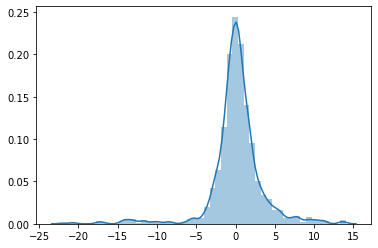

In [40]:
errors2 = preds2 - np.array(y_test).flatten()
sns.distplot(errors2) # We expect the distribution to be normal around zero!

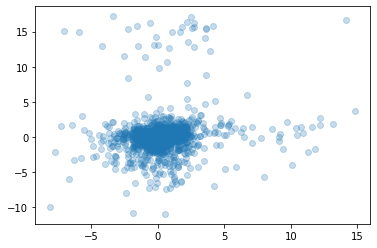

In [41]:
plt.scatter(preds2, np.array(y_test).flatten(), alpha=0.25)

#### 3.2. Probabilistic neural network predicting log profitability

In [18]:
from tensorflow_probability import layers as tfpl
from tensorflow_probability import distributions as tfd

In [19]:
model3 = tfk.Sequential([
    tfpl.DenseFlipout(32, activation='relu', input_shape=[X_train.shape[1]]),
    tfkl.Dense(1, activation='relu'),
    tfpl.DistributionLambda(make_distribution_fn=lambda t: tfd.Normal(
          loc=t, scale=1e-7 + tf.math.softplus(0.02 * t),
      ))
])

model3.compile(optimizer=tf.optimizers.Adam(1e-2), loss=tfk.losses.KLDivergence(), metrics=[])
model3.fit(np.array(X_train), np.array(y_train), validation_split=0.2, batch_size=150, 
          epochs=500, workers=10, use_multiprocessing=True)

Instructions for updating:
Please use `layer.add_weight` method instead.
Train on 2078 samples, validate on 520 samples
Epoch 1/500
2078/2078 [==============================] - 1s 374us/sample - loss: 1894.9136 - val_loss: 1836.2757
Epoch 2/500
2078/2078 [==============================] - 0s 22us/sample - loss: 1788.3508 - val_loss: 1731.8247
Epoch 3/500
2078/2078 [==============================] - 0s 21us/sample - loss: 1683.8585 - val_loss: 1627.8335
Epoch 4/500
2078/2078 [==============================] - 0s 21us/sample - loss: 1580.6952 - val_loss: 1525.4751
Epoch 5/500
2078/2078 [==============================] - 0s 24us/sample - loss: 1478.9218 - val_loss: 1424.3763
Epoch 6/500
2078/2078 [==============================] - 0s 20us/sample - loss: 1378.4352 - val_loss: 1324.6568
Epoch 7/500
2078/2078 [==============================] - 0s 21us/sample - loss: 1279.3849 - val_loss: 1226.4448
Epoch 8/500
2078/2078 [==============================] - 0s 19us/sample - loss: 1182.0043 - val

2078/2078 [==============================] - 0s 19us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 73/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 74/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 75/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 76/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 77/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 78/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 79/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 80/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 81/500
2078/2078 [========

Epoch 147/500
2078/2078 [==============================] - 0s 20us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 148/500
2078/2078 [==============================] - 0s 19us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 149/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 150/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 151/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 152/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 153/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 154/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 155/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 156/

2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 222/500
2078/2078 [==============================] - 0s 20us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 223/500
2078/2078 [==============================] - 0s 20us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 224/500
2078/2078 [==============================] - 0s 19us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 225/500
2078/2078 [==============================] - 0s 19us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 226/500
2078/2078 [==============================] - 0s 19us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 227/500
2078/2078 [==============================] - 0s 19us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 228/500
2078/2078 [==============================] - 0s 20us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 229/500
2078/2078 [==============================] - 0s 19us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 230/500
2078/2078 

2078/2078 [==============================] - 0s 19us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 296/500
2078/2078 [==============================] - 0s 19us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 297/500
2078/2078 [==============================] - 0s 20us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 298/500
2078/2078 [==============================] - 0s 20us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 299/500
2078/2078 [==============================] - 0s 22us/sample - loss: -0.0856 - val_loss: -0.0758
Epoch 300/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0860 - val_loss: -0.0779
Epoch 301/500
2078/2078 [==============================] - 0s 21us/sample - loss: -0.0868 - val_loss: -0.0782
Epoch 302/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0870 - val_loss: -0.0783
Epoch 303/500
2078/2078 [==============================] - 0s 19us/sample - loss: -0.0870 - val_loss: -0.0783
Epoch 304/500
2078/2078 

2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 370/500
2078/2078 [==============================] - 0s 19us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 371/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 372/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 373/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 374/500
2078/2078 [==============================] - 0s 19us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 375/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 376/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 377/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 378/500
2078/2078 

2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 444/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 445/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 446/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 447/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 448/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 449/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 450/500
2078/2078 [==============================] - 0s 17us/sample - loss: -0.0870 - val_loss: -0.0783
Epoch 451/500
2078/2078 [==============================] - 0s 18us/sample - loss: -0.0871 - val_loss: -0.0783
Epoch 452/500
2078/2078 

In [104]:
preds3 = model3.predict(X_test).flatten()

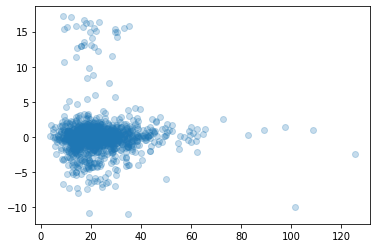

In [105]:
plt.scatter(preds3, np.array(y_test).flatten(), alpha=0.25)

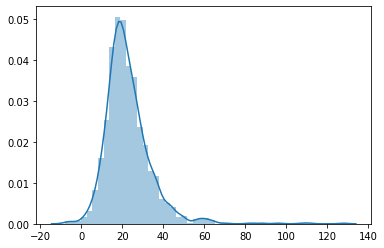

In [106]:
errors3 = preds3 - np.array(y_test).flatten()
sns.distplot(errors3)

#### 3.3 Traditional network with a classification problem instead

In [109]:
df["profitability"].head(10)

0    9.811553e-01
1    2.382856e+01
2    1.307847e+01
3    2.007407e+00
4    6.633332e+00
5    1.000000e-01
6    7.990000e+07
7    4.907538e+00
8    5.202172e+00
9    1.611993e+01
Name: profitability, dtype: float64

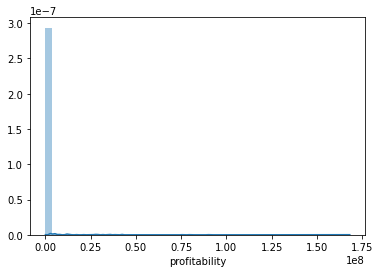

In [120]:
sns.distplot(df["profitability"])

In [124]:
df["profitability"].describe()

count    3.878000e+03
mean     3.106848e+05
std      4.176109e+06
min      1.800000e-05
25%      4.534598e-01
50%      1.080599e+00
75%      2.260034e+00
max      1.682136e+08
Name: profitability, dtype: float64

In [125]:
def classify_ratio(ratio):
    if ratio < 1.1:
        return 0
    else:
        return 1

In [126]:
df["profitability_class"] = df["profitability"].apply(lambda x : classify_ratio(x))

In [128]:
model4 = tfk.Sequential([
    ...
])

count    3878.000000
mean        0.496132
std         0.500050
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: profitability_class, dtype: float64